In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# train - набір для навчання test - набір для тестування
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# назви
classes = ['футболка', 'брюки', 'светр', 'плаття', 'пальто', 'туфлі', 'сорочка', 'кросівки', 'сумка', 'черевики']

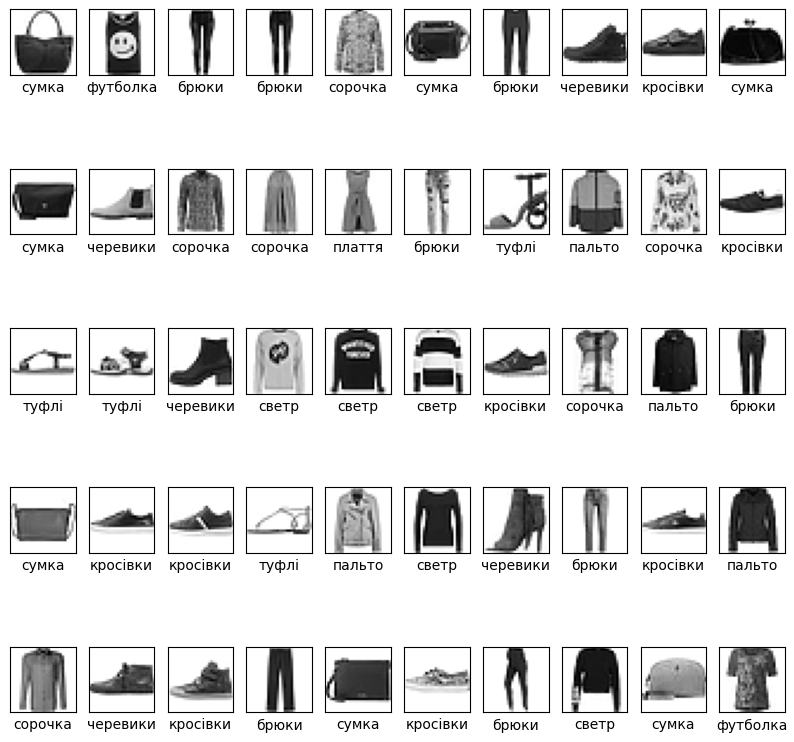

In [3]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [4]:
# перетворення розмір зображень
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# векторизовані операції до усіх елементів
x_train = x_train / 255
x_test = x_test / 255
# правильні відповіді
n = 0
print(y_train[n])

9


In [5]:
# перетворення у формат one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
# вивід
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [6]:
# нейрона мережа
# створення послідовної моделі
model = Sequential()
# вхідний шар 800 нейронів по 784 входи в кожен нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# новий шар
model.add(Dense(400, input_dim=784, activation="relu"))
# вихідний шар 10 нейронів
model.add(Dense(10, activation="softmax"))

In [7]:
# компіляція мережі
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
# нвчання мережі
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 3s 15ms/step - loss: 0.2557 - accuracy: 0.9096 - val_loss: 0.3389 - val_accuracy: 0.8791
Epoch 2/100
240/240 [==============================] - 4s 16ms/step - loss: 0.2562 - accuracy: 0.9098 - val_loss: 0.3235 - val_accuracy: 0.8848
Epoch 3/100
240/240 [==============================] - 3s 14ms/step - loss: 0.2536 - accuracy: 0.9105 - val_loss: 0.3274 - val_accuracy: 0.8842
Epoch 4/100
240/240 [==============================] - 4s 17ms/step - loss: 0.2527 - accuracy: 0.9117 - val_loss: 0.3242 - val_accuracy: 0.8837
Epoch 5/100
240/240 [==============================] - 5s 20ms/step - loss: 0.2513 - accuracy: 0.9119 - val_loss: 0.3236 - val_accuracy: 0.8846
Epoch 6/100
240/240 [==============================] - 6s 23ms/step - loss: 0.2498 - accuracy: 0.9130 - val_loss: 0.3200 - val_accuracy: 0.8880
Epoch 7/100
240/240 [==============================] - 4s 15ms/step - loss: 0.2507 - accuracy: 0.9122 - val_loss: 0.3226 - val_accuracy:

In [11]:
model.save('fashion_mnist.h5')